# 13. Transformer가 나오기까지
---
[transformer architecture 정리](https://incredible.ai/nlp/2020/02/29/Transformer/)


13-1. 들어가며<br>
13-2. Attention의 역사 | `Attention` 개념을 학습합니다.<br>
13-3. Attention Is All You Need! | Transformer의 Attention 개념을 학습합니다.<br>
13-4. Positional Encoding | `Positional Encoding` 원리를 학습합니다.<br>
13-5. Multi-Head Attention | `Multi-Head Attention` 원리를 학습합니다.<br>
13-6. Position-wise Feed-Forward Networks | `Position-wise Feed-Forward Networks` 원리를 학습합니다.<br>
13-7. Additional Techniques | `Add` & `Norm`에 대해서 학습합니다.<br>
13-8. 트랜스포머, 그 후엔 | `BERT`와 `GPT`에 대해서 학습합니다.<br>
13-9. 마무리하며


### Keyword

1. attention 역사
2. Transformer (Attention all you need) 
    1. Positional Encoding
        1. sinusoid encoding
        2. positional embedding
    2. Multi-Head Attention
        1. scaled dot-product attention
        2. 인과 관계 마스킹(Causality Masking)
        3. multi-head attention
    3. Position-wise Feed-Forward Networks
    4. Additional Techniques: Add & Norm
        1. Layer Normalization
        2. Residual Connection
        3. Learning Rate Schedular
        4. Weight Shareing
3. Transformer 이후
    1. GPT, BERT
    2. Transformer-XL
    3. Reformer

## 13-1. 들어가며
---

### 학습 목표
- 트랜스포머 이전의 **Attention** 기법에 대해 간단하게 설명할 수 있다.
- 트랜스포머에 포함된 **모듈**들을 심층적으로 이해할 수 있다.
- 트랜스포머를 발전시키기 위해 **적용된 여러 테크닉**들을 설명할 수 있다.


## 13-2. Attention의 역사
---
<!--
- Attention 기법 : 
    - <u>입력 시퀀스의 **각 위치에 대해 가중치를 부여**</u>하여 <u>중요한 정보에 집중</u>하는 메커니즘입니다.
    - Attention은 트랜스포머(Transformer) 모델에서 주로 사용되며, 
    - Seq2seq 모델의 성능을 향상시키고 장기 의존성 문제를 완화하는 데에도 사용됩니다.
    

- **Sequence-to-sequence(Seq2seq)**는 신경망 언어 모델, 특히 기계번역에서 혁신적인 발전을 이룩해냈습니다. 기존의 단일 RNN은 번역에 적합한 구조가 아니었으나 두 개의 RNN을 결합한 Encoder-Decoder 구조를 만들어 문맥 전체를 반영한 번역이 가능하게 했죠.


- Bahdanau Attention: [Attn: Illustrated Attention](https://eda-ai-lab.tistory.com/157)
- Luong Attention: [[Attention] Luong Attention 개념 정리](https://hcnoh.github.io/2019-01-01-luong-attention)
-->

- `simple RNN` :
    - **긴 입력 정보 학습 어려움(vanishing gradient)**
    - 번역 task에 맞지 않는 구조
    - sequential -> **병렬처리 불가능** -> transformer
    

- -> `seq2seq` : LSTM encoder-decoder 제시
    - encoder input sequence `x` 입력
    - 고정된 크기의 representation vector(context vector) `v`를 decoder에 전달
    - decoder는 output sequence `y` 출력
    - **고정된 context vector 정보손실 문제**
    
    
- -> `Bahdanau attention` mechanism : 
    - 모든 단어를 같은 비중으로 압축하는게 아닌 
    - 번역하는 데 중요한 단어만 큰 비중을 줘서 성능을 높임
    - 매 스텝의 hidden state 사용
    - 문제 : t step에서 decoder의 hidden state를 구하려면 t-1 시점을 hidden state를 사용해야함
        - 재귀적으로 동작하는 RNN에 역행하는 연산 -> 효율적이지 못함 
        
        
- ~> `Luong attention` 
- ~> Attention all you need : `Transformer`


## 13-3. Attention Is All You Need!
---

### [Attention Is All You Need](https://arxiv.org/pdf/1706.03762.pdf)
<!--
> We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely.
>
>(우리는 RNN과 CNN을 완전히 배제하고 Attention 메커니즘에만 기반을 둔 새롭고 단순한 구조, Transformer를 제안합니다.)*

저자들은 문장에서 **연속성이라는 개념을 과감히 배제** 하였습니다. 대신 **Attention으로 각 단어들의 상관관계를 구하는 데 집중** 하였죠. 일전에 배우셨듯이 
- 문장을 모델링 한다는 것은: <u>주어진 단어를 보고 모르는 단어에 확률을 할당</u>하는 것입니다. 

 연속성이 배제된 채로 문장을 모델링 한다는 것은, 단순히 생각하면 입력으로 빨간 사과 노란 바나나가 들어가는 것과 노란 사과 빨간 바나나가 들어가는 것이 동일하게 취급되는 셈입니다.

RNN처럼 단어 입력을 순차적으로 처리하지도 않으면서 어떻게 문장을 정확히 처리해냈는지는 차근차근 이해해 보도록 하죠!

### transformer 구조 : 
![image.png](attachment:image.png)

- 트랜스포머도 엄밀하게는 Seq2seq에서 제안된 `Encoder-Decoder` 구조를 사용합니다. 
- 대신 그 안에는 **LSTM 대신 다양한 모듈**들이 가득 차 있죠. 
- 그리고 이 멋진 **Encoder와 Decoder를 여러 개(논문에서는 6개) 쌓아올려 모델을 완성**합니다.

>가끔 헷갈려 하시는 분들이 있어 첨언하면, <br>
`Enc`-`Dec`-`Enc`-`Dec`-... 구조가 아닌 <br>
`Enc`-`Enc`-...-`Dec`-`Dec`-... 구조입니다!

먼저 문장의 연속성을 어떻게 배제할 수 있었는지, 모델의 최하단에 위치한 **Positional Encoding** 부터 차근차근 알아보도록 하겠습니다.
-->
**Transformer** :
- RNN, CNN 완전히 배제
- 연속성이라는 개념 배제 -> `Positional encoding` 개념
- Attention으로 각 단어의 상관관계에 집중
- Encoder-Decoder 구조 사용 (seq2seq에서 제안된)
- LSTM 대신 다양한 모듈 사용


## 13-4. Positional Encoding
---
<!--
###  "`Positional Encoding`": 문장에 **연속성을 부여하는 새로운 방법**을 제시
[jeongstudy: positional encoding이란 무엇인가](https://skyjwoo.tistory.com/31)

- attention layer에 들어가기 전에 입력값으로 주어질 단어 vector 안에 positional encoding 정보, 즉, **단어의 위치 정보**를 포함시키고자 하는 것

#### 어떻게 위치정보를 전달할까? - 두 가지 방법, 한계
>1. 각 단어에 **0~1 사이의 값**을 더한다. 0을 첫 번째 단어로, 1을 마지막 단어로 한다.
>    - 한계 : 문장의 길이에 따라 더해지는 값이 가변적이다. 따라서 **단어 간의 거리(Delta)가 일정하지 않다.**
>
>
>2. 각 단어에 **선형적으로 증가하는 정수**를 더한다.
>    - 한계 : 단어 간의 거리(Delta)가 일정해지는 것은 좋지만 **범위가 무제한이기 때문에 값이 매우 커질 수 있고 모델이 일반화하기 어려워진다.**





![image.png](attachment:image.png)

이전 스텝에서 문장의 연속성을 배제할 경우 `빨간 사과` `노란 바나나`와 `노란 사과` `빨간 바나나`를 같은 문장으로 간주하게 된다고 했죠? 
- Positional Encoding은 그런 불상사를 막기 위한 방법입니다. 
- 즉, 문장에 연속성을 부여하는 새로운 방법을 제시한 거죠.

- 쉽게 말하면 <u>입력이 들어온 순서대로 단어에 표기</u>를 하는 것과 같습니다. 예를 들면 `[빨간 + 1] [사과 + 2] [노란 + 3] [바나나 + 4]`과 같은 모양새로 말이죠. 하지만 그렇다고 단어 Embedding에 선형적으로 증가하는 값을 더해줬다간 후에 데이터의 분포가 엉망이 될 겁니다. 문제없이 Position을 나타낼 수 있는 방법엔 어떤 것들이 있을까요? 아래 웹페이지에서 자세한 내용을 확인해보세요!


>#### Positional Encoding이 만족해야 할 4가지 조건
>1. 각 Time-step마다 고유의 Encoding 값을 출력해야 한다.
>2. 서로 다른 Time-step이라도 같은 거리라면 차이가 일정해야 한다.
>3. 순서를 나타내는 값이 특정 범위 내에서 일반화가 가능해야 한다.
>4. 같은 위치라면 언제든 같은 값을 출력해야 한다.

### Positional Encoding 수식:
![image-2.png](attachment:image-2.png)

- `pos`는 단어가 위치한 Time-step을 의미하며 

- `i`는 Encoding 차원의 Index, 

- `d_model`은 모델의 Embedding 차원 수입니다. 

- 이를 `Sinusoid(사인파) Embedding`이라고 칭합니다. 이해를 돕기 위해 실제 구현을 확인해보죠.
-->

###  "`Positional Encoding`": 문장에 **연속성을 부여하는 새로운 방법**을 제시
[jeongstudy: positional encoding이란 무엇인가](https://skyjwoo.tistory.com/31)


[아이디어] : 입력이 들어온 순서대로 단어에 표기. position정보 더해줌
- attention layer에 들어가기 전, 
- 입력 단어 vector 안에 **positional encoding 정보(단어의 위치 정보)**를 포함시켜줌


- 두 가지 방법과 한계
    1. 데이터에 0~1 의 label을 붙여줌 (첫 단어-> 0 / 마지막 단어 -> 1)
        - 예시 : `I love you` => `I: 0` / `love: 0.5` / `you: 1`
        - 한계 : Input의 **총 크기**를 알 수 없다. 따라서 **delta 값이 일정한 의미를 갖지 않는다.**
            - (delta = 단어의 label 간 차이)<br><br>
    
    2. 각 time-step마다 선형적으로 숫자를 할당
        - (총 크기에 따라 가변적, delta일정해짐) 
        - 따라서 첫번째 단어 는 1, 두 번째 단어는 2를 갖게 됨
        - 예시 : `I love you` => `I: 1` / `love: 2` / `you: 3`
        - 한계 : 
            - 숫자가 매우 커질 수 있고, 
            - 훈련 시 학습할 때보다 큰 값이 입력값으로 들어오게 될 때 문제 발생 
            - 모델의 일반화 가 어려워짐
                -특정한 범위 값을 갖는게 아니기에


[이상적인 모델의 기준(저자가 제시한)]
<!--
1. 각 time-step(문장에서 단어의 위치)마다 **하나의 유일한 encoding 값**을 출력해 내야 한다.

2. <u>서로 다른 길이의 문장</u>에 있어서 **두 time-step 간 거리는 일정**해야 한다. 

3. **모델에 대한 일반화**가 가능해야 한다. <br>
 ~ 더 긴 길이의 문장이 나왔을 때 적용될 수 있어야 한다. <br>
 ~ 즉, <u>순서를 나타내는 값</u> 들이 **특정 범위 내에** 있어야 한다. 
    
4. 하나의 key 값처럼 결정되어야 한다. 매번 다른 값이 나와선 안된다.
-->
1. 각 Time-step마다 고유의 Encoding 값을 출력해야 한다.
2. 서로 다른 Time-step이라도 같은 거리라면 차이가 일정해야 한다.
3. 순서를 나타내는 값이 특정 범위 내에서 일반화가 가능해야 한다.
4. 같은 위치라면 언제든 같은 값을 출력해야 한다.

<!--
[ positional encoding에서 ]
1. d-dimensional vector로 문장 내 특정 위치 정보를 표현
2. 두번째로 이 인코딩은 모델 자체 내에서 사용되지 않았다. 대신에 이 vector는 각 단어에 붙어 문장 내 위치 정보를 표시하게 되었다. 즉, **단어의 순서 정보를 표현하기 위해 input을 늘렸다.**
3. 
-->


> [수식] : **Positional Encoding ~ Sinusoid(사인파) Embedding** <br><br> 
>$\quad\quad PE_{(pos, 2i)} = sin(pos/10000^{2i/d_{model}})$<br>
>$\quad\quad PE_{(pos, {2i+1})} = cos(pos/10000^{2i/d_{model}})$ 
>
>- $pos$: 단어가 위치한 Time-step
>- $i$: Encoding 차원의 Index
>- $d_{model}$: 모델의 Embedding 차원 수
>
> : Sinusoid(사인파) Embedding


### Positional Endoding 구현

In [1]:
# Positional Encoding 구현
'''
직접 Positional Encoding의 
    1번째 열과 
    2번째 열을 
4번째 행까지 구해보는 하드 코딩이 포함
'''

import numpy as np

def positional_encoding(pos, d_model):
    '''
    pos : time step
    d_model : embedding 차원 수
    '''
    
    # sin, cos에 들어갈 각도 : sin("__")
    def cal_angle(position, i):
        '''
        position : time step
        i : encoding 차원의 index
        '''
        # np.power(m, n) : m^n
        return position / np.power(10000, int(i) / d_model) 

    # embedding 차원 수(d_model) 만큼 "각도 정보 벡터" 생성
    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]

    # 모든 time step(pos)에 대한 "각도 정보 matrix" 생성
    sinusoid_table = np.array([get_posi_angle_vec(pos_i) for pos_i in range(pos)])

    # sin, cos함수 들어간 "PE matrix" 생성
    # i = 2k,     : sin
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2]) # index ~ 0, 2, 4, ...
    # i = 2k + 1, : cos
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2]) # index ~ 1, 3, 5, ...

    # 최종 PE tabel 리턴
    return sinusoid_table

In [4]:
pos = 7
d_model = 4
i = 0

# time step, embedding 차원 수 를 입력으로 받아 => sinusoid tabel(matrix) 리턴
print("Positional Encoding 값:\n", positional_encoding(pos, d_model))

# i가 짝수일 때 PE값 : PE_{pos, 2i} = sin ~
print("") #                         pos / w_k
print("if pos == 0, i == 0 일때, PE값: ", np.sin(0 / np.power(10000, 2 * i / d_model)))
print("if pos == 1, i == 0 일때, PE값: ", np.sin(1 / np.power(10000, 2 * i / d_model)))
print("if pos == 2, i == 0 일때, PE값: ", np.sin(2 / np.power(10000, 2 * i / d_model)))
print("if pos == 3, i == 0 일때, PE값: ", np.sin(3 / np.power(10000, 2 * i / d_model)))

# i가 홀수일 때 PE값 : PE_{pos, 2i+1} = cos ~
print("") #                         pos / w_k
print("if pos == 0, i == 1 일때, PE값: ", np.cos(0 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 1, i == 1 일때, PE값: ", np.cos(1 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 2, i == 1 일때, PE값: ", np.cos(2 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 3, i == 1 일때, PE값: ", np.cos(3 / np.power(10000, 2 * i + 1 / d_model)))

Positional Encoding 값:
 [[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.99500417  0.00999983  0.9999995 ]
 [ 0.90929743  0.98006658  0.01999867  0.999998  ]
 [ 0.14112001  0.95533649  0.0299955   0.9999955 ]
 [-0.7568025   0.92106099  0.03998933  0.999992  ]
 [-0.95892427  0.87758256  0.04997917  0.9999875 ]
 [-0.2794155   0.82533561  0.05996401  0.999982  ]]

if pos == 0, i == 0 일때, PE값:  0.0
if pos == 1, i == 0 일때, PE값:  0.8414709848078965
if pos == 2, i == 0 일때, PE값:  0.9092974268256817
if pos == 3, i == 0 일때, PE값:  0.1411200080598672

if pos == 0, i == 1 일때, PE값:  1.0
if pos == 1, i == 1 일때, PE값:  0.9950041652780258
if pos == 2, i == 1 일때, PE값:  0.9800665778412416
if pos == 3, i == 1 일때, PE값:  0.955336489125606


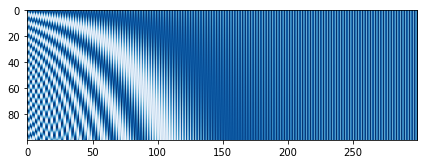

In [6]:
# 시각화: Position 값이 각 Time-step 별로 고유

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.imshow(positional_encoding(100, 300), cmap='Blues') # pos=100(세로): time-step, d_model=300(가로): position값
plt.show()

- 세로축이 `Time-step`에 해당하고 
- 가로축이 Word Embedding에 더해질 `Position 값`입니다. 
- 각 스텝마다 고유한 값을 가짐

### Positional Embedding

저자들은 이뿐만 아니라 **Positional Embedding** 기법도 제안했습니다. <br>
- 수식적으로 계산한 Position 값이 아니라 
- **Position에 대한 정보를 담은 Embedding 레이어를 선언**하여 
- <u>**위치에 대한 정보**를 **학습**</u>할 수 있게 한 거죠. 

그림으로 표현하면 아래와 같습니다

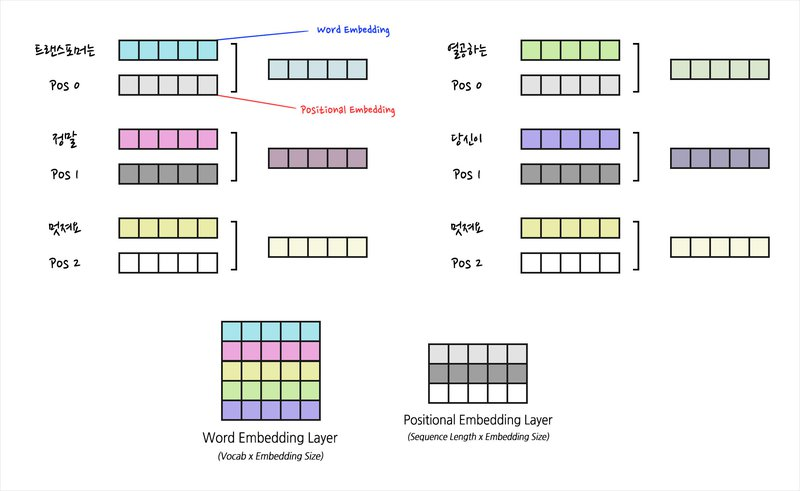

위와 같은 구조에서 `Positional Embedding`이 훈련 중 <u>값이 변한다고 하더라도</u> 그것은 **모든 문장에 대해 동일하게 적용**되기에 문제가 되지 않습니다. 오히려 `Sinusoid Embedding`보다 적합한 값이 학습될 것을 기대할 수도 있죠!

하지만 실제로는 <u>두 방법 모두 거의 동일한(±0.1 BLEU) 결과</u>를 보였으며, 
- 저자들은 길이가 길어져도 부담이 없는 `Sinusoid Embedding`을 채택하였습니다. 
- `Positional Embedding`은 <u>문장의 길이만큼 Embedding Table의 크기가 커지</u>니까요. 

- `Positional Embedding`은 추후에 `BERT`라는 모델에 적용되어 멋진 성능을 보여줄 예정입니다!

## 13-5. Multi-Head Attention
---
(1) Scaled Dot-Product Attention<br>
(2) 인과 관계 마스킹(Causality Masking)<br>
(3) Multi-Head Attention<br>

---

- 트랜스포머의 핵심
- Positional Embedding이 된 문장으로부터 **Attention을 추출**하는 부분

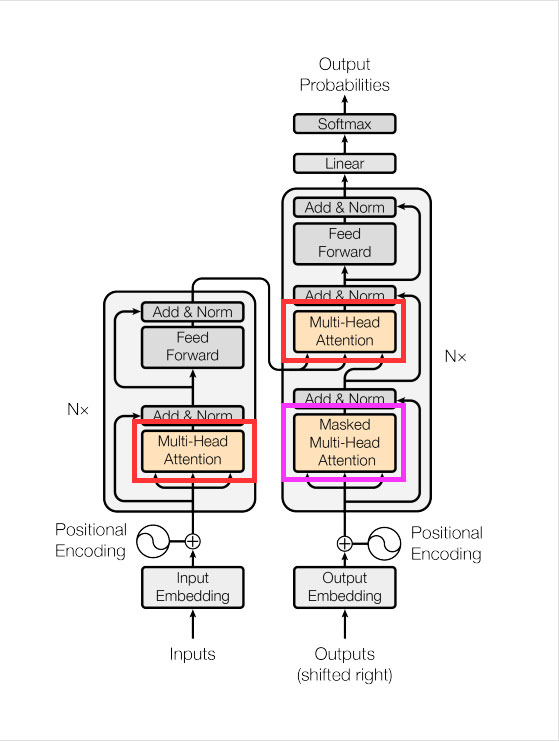


- `Masked Multi-Head Attention`은 **Multi-Head Attention과 동일**하지만 
- `인과 관계 마스킹(Causality Masking)` 이라는 과정이 하나 더 추가


Multi-Head Attention 모듈은 
- `Linear 레이어`와 

- `Scaled Dot-Product Attention 레이어`로 이루어집니다.

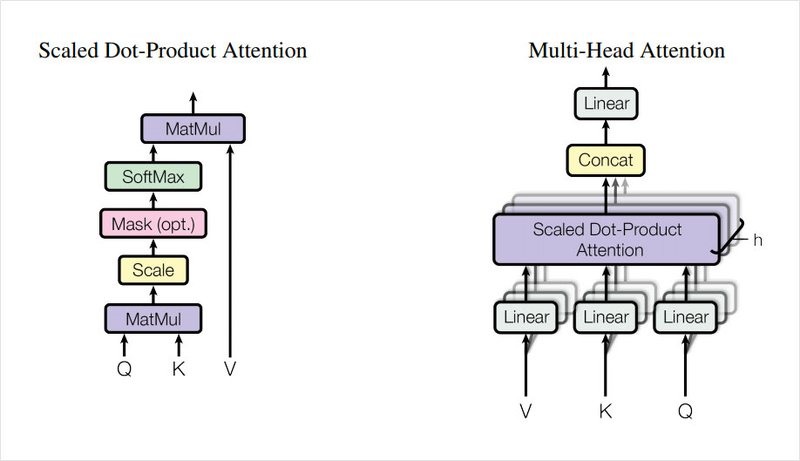

### (1) Scaled Dot-Product Attention
---

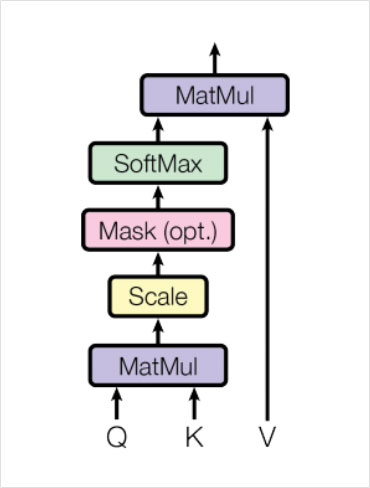

- seq2seq 인코더-디코더 구조에서 attention이란 
    - 디코더의 포지션 $i$에서 바라본 
    - 인코더의 context vector $c_i$를 해석하기 위해, 
    - 인코더의 각 포지션 $j$에 부여한 가중치
    - 이 가중치는 디코더의 state $s_i$와 인코더의 state $h_j$사이의 유사도를 통해 계산
    

- Scaled Dot-Product Attention -> 원리는 동일. 대신,
    - Decoder state : `Q(query)`
    - Encoder state : `K(key)` 로 추상화<br><br>
    - Q와 K의 유사도를 dot product로 계산하여 :
    - $attention\; weight = softmax(\frac{QK^T}{\sqrt{d_k}})$를 통해 `V(value)`를 재해석

    - 다른점 : encoder에서 기존 attention의 $h_j$ -> K, V 2개로 분화
    
> ### Q, K, V?
> key, value는 사실상 같은 단어를 의미. <br>
>하나의 query와 모든 key 들과의 연관성을 계산한 뒤,<br>
> 그 값들을 확률값으로 만들어 줌(softmax)<br>
> 그 후에 value를 곱해 value에 대해서 scaling해줌


### scaling?
- vector의 길이(dimension)이 커질수록 dot product값이 커짐<br>
- softmax를 거치기에 backprop시 미분값이 작아짐. <br>
- $\frac{1}{\sqrt{d_k}}$를 곱해서 dimension이 커져도 너무 큰 값을 가지지 않게 scaling

-> scaling 구현:

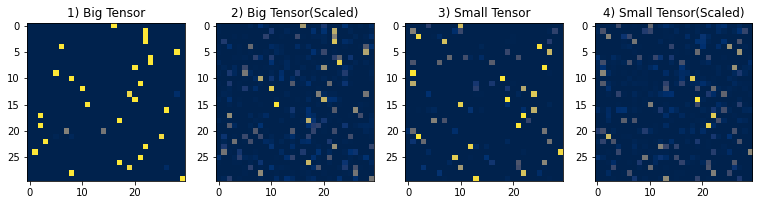

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt


def make_dot_product_tensor(shape):
    # 같은 범위[-3, 3] random tensor 생성
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])
    # dot product
    return tf.tensordot(A, B, axes=1)

length = 30
big_dim = 1024.
small_dim = 10.

# shape : (30, 1024)
big_tensor = make_dot_product_tensor((length, int(big_dim))) 
scaled_big_tensor = big_tensor / tf.sqrt(big_dim) # scaling

# shape : (30, 10)
small_tensor = make_dot_product_tensor((length, int(small_dim))) 
scaled_small_tensor = small_tensor / tf.sqrt(small_dim) # scaling

fig = plt.figure(figsize=(13, 6))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

# scaling 결과 시각화 (big dimension, small dimension 비교)
ax1.set_title('1) Big Tensor')
ax2.set_title('2) Big Tensor(Scaled)')
ax3.set_title('3) Small Tensor')
ax4.set_title('4) Small Tensor(Scaled)')

ax1.imshow(tf.nn.softmax(big_tensor, axis=-1).numpy(), cmap='cividis')
ax2.imshow(tf.nn.softmax(scaled_big_tensor, axis=-1).numpy(), cmap='cividis')
ax3.imshow(tf.nn.softmax(small_tensor, axis=-1).numpy(), cmap='cividis')
ax4.imshow(tf.nn.softmax(scaled_small_tensor, axis=-1).numpy(), cmap='cividis')

plt.show()

- 모두 같은 범위인 [-3, 3]에서 랜덤 Tensor를 만들어 실제 Attention을 하듯 Dot-Product를 하고, Softmax를 취했습니다. 


- 위 히트맵에서 **어두운 부분으로는 미분 값(Gradient) 이 흐르기 어렵기 때문**에 <u>모델이 넓은 특성을 반영할 수 없게</u> 됩니다. 
- 즉, 히트맵이 선명할수록 모델의 시야가 편협해진다 고 이해하시면 좋아요!


- [1, 3]: 위 시각화를 통해 Embedding의 깊이가 깊을수록 모델의 시야가 편협해지는 문제가 생기고, 
- [2, 4]: Scale은 그 문제의 훌륭한 해결책임을 확인할 수 있습니다. 


심지어 **깊이에 무관하게 일정한 결과를 만들어**내므로 **어떤 경우에도 적용**할 수 있는 훌륭한 Attention 기법이 탄생했음을 알 수 있습니다!

### (2) 인과 관계 마스킹(Causality Masking)
---

>자기 회귀(Autoregressive)
>Sequence-to-sequence 모델을 훈련할 때에 
>- Decoder의 첫 입력으로 `<start>` 토큰이 들어가던 것을 기억하실 겁니다. 
>- 그럼 Decoder는 `컨텍스트 벡터로 압축된 입력 문장`과 `<start>` 토큰만을 단서로 <u>"첫 번째 단어를 생성"</u>해야 하죠. 
>- 그다음 스텝도 <u>같은 단서에 추가로 방금 **Decoder 본인이 생성한 첫 번째 단어를 포함**</u>하여 <u>두 번째 단어를 생성</u>합니다. <br>
>
>이 같은 특성을 **자기 회귀(Autoregressive)** 라 칭합니다. <u>자기 자신을 입력으로 하여 자기 자신을 예측</u>하는 것이죠.


하지만 트랜스포머는 <u>모든 단어를 병렬적으로 처리</u>하기에 **자기 회귀적인 특성을 잃어**버립니다. <br>
이는 곧 문장을 생성할 수 없다는 의미이고, 쓸모가 없다는 얘기죠!


이에 저자들이 <u>자기 회귀적인 특성을 살리기 위해 추가한 것</u>이 바로 **인과 관계 마스킹(Causality Masking)** 입니다! 
- 인과 관계 마스킹은 **목표하는 문장의 일부를 가려 인위적으로 연속성을 학습 하게 하는 방법**입니다.

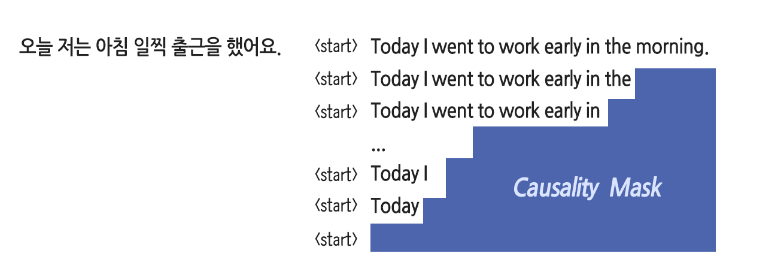

위와 같은 과정을 거치면 <u>모든 Time-Step에 대한 입력을 한 번에 처리</u>하면서 <u>자기 회귀적인 특성도 유지</u>하게 됩니다. 


테스트 시 **소스 문장을 Encoder에 전달**하고 **타겟 문장은 `<start>`만** 넣더라도 
- **모델이 `<start>` 토큰만 보고 문장을 생성한 적**(위 그림의 마지막 Step)이 있기 때문에 첫 번째 단어를 생성해낼 수 있고, 
- 생성된 단어는 다시금 입력으로 전달되어 그야말로 **자기 회귀적으로 문장을 생성**하게 됩니다.

이러한 연유로 인과 관계 마스크는 "대각항을 포함하지 않는" 삼각 행렬의 모양새를 갖습니다. 
- 인과관계 마스크 ~~ 삼각행렬

입력 문장만을 보고 첫 번째 단어를 생성하는 것은 타겟 문장을 모두 가리는 것이 타당하니 대각항을 포함하는 게 맞지만, 
- 그럴 경우 Attention 값을 구하는 과정에서 마지막(혹은 첫 번째) 행이 0개 요소에 대해 Softmax를 취하게 되므로 오류를 야기합니다. 

따라서 `<start>` 토큰을 활용해 <u>마스크가 대각항을 포함하지 않는 형태</u>가 되게끔 만든 것이죠.

-> 마스킹 구현:

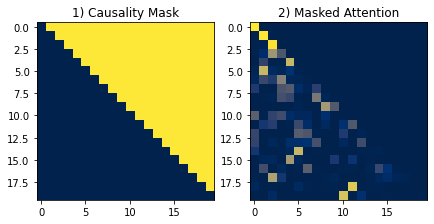

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def make_dot_product_tensor(shape):
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

    return tf.tensordot(A, B, axes=1)

# casuality mask 생성
def generate_causality_mask(seq_len):
    # np.eye : square 대각행렬 생성 (https://yeowool0217.tistory.com/474)
    # np.cumsum: 원소 누적 합 (https://m.blog.naver.com/allenpython/220401132533) axis = 0은 같은 column 끼리의 누적 합
    mask = 1 - np.cumsum(np.eye(seq_len, seq_len), 0) # 
    return mask


# tensor shape : (20, 512)
sample_tensor = make_dot_product_tensor((20, 512))
# scaling
sample_tensor = sample_tensor / tf.sqrt(512.)
# mask shape : (20, 20)
mask = generate_causality_mask(sample_tensor.shape[0])


# 시각화
fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title('1) Causality Mask')
ax2.set_title('2) Masked Attention')

# sample tensor 모양 원소 1인 마스크 
ax1.imshow((tf.ones(sample_tensor.shape) + mask).numpy(), cmap='cividis')

# sample tensor에 mask 씌우고 softmax
mask *= -1e9 # 마스킹 할 영역을 -∞해서 dot product에 더해줌 -> 0의 확률을 할당
ax2.imshow(tf.nn.softmax(sample_tensor + mask, axis=-1).numpy(), cmap='cividis')

plt.show()

In [16]:
#mask
'''

[-0.e+00,                \ -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09]
[-0.e+00, -0.e+00,        \ -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09]
[-0.e+00, -0.e+00, -0.e+00,\ -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09, -1.e+09]
...

'''
print()

- 좌측은 실제 마스크의 형태, 
- 우측은 마스킹이 적용된 Attention입니다. 

마스킹은 **마스킹 할 영역을 -∞로** 채우고 **그 외 영역을 0으로** 채운 배열을 
- Dot-Product된 값에 더해주는 방식으로 진행됩니다. 

후에 진행될 Softmax는 **큰 값에 높은 확률을 할당**하는 함수이므로 -∞로 가득 찬 마스킹 영역에는 무조건 0의 확률을 할당하게 됩니다.



## (3) Multi-Head Attention
---
### Multi-Head Attention : attention을 여러개의 head로 나누어 다양한 정보를 얻기 위해 사용된 구조

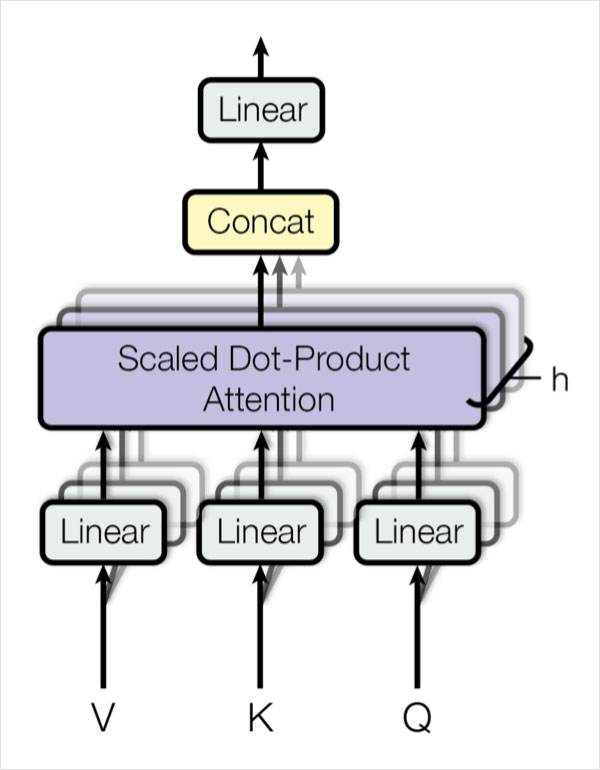

>`바나나`라는 단어가 512차원의 Embedding을 가진다고 가정합시다. 
>- 그중 64차원은 `노란색`에 대한 정보를 표현하고, 
>- 다른 64차원은 `달콤한 맛`에 대한 정보를 표현할 겁니다. 
>
>같은 맥락으로 바나나의 형태, 가격, 유통기한까지 모두 **표현**될 수 있겠죠. 
>
>저자들은 **'이 모든 정보들을 섞어서 처리하지 말고, 여러 개의 Head로 나누어 처리하면 Embedding의 <u>다양한 정보</u>를 캐치할 수 있지 않을까?'** 라는 아이디어를 제시합니다.


- Head는 주로 8개를 사용
>- Embedding된 10개 단어의 문장이 `[10, 512]`의 형태를 가진다면, 
>- Multi-Head Attention은 이를 `[10, 8, 64]`로 **분할하여 연산**합니다. 
>- 각 64차원의 Embedding을 독립적으로 Attention한 후, 
>- 이를 <u>이어붙여</u> 다시금 `[10, 512]`의 형태로 되돌리며 연산은 끝이 납니다.

### Linear layer가 추가된 이유

"에이, 쪼개진 64차원이 연관 있는 것들끼리 묶여있을 거란 보장이 없잖아요~"

- Head로 쪼갠 Embedding들끼리 유사한 특성을 가진다는 보장이 없기 때문에 
- **앞단에 `Linear 레이어`를 추가**해 주는 겁니다. 
    - **Linear 레이어는 데이터를 특정 분포로 매핑 시키는 역할**을 해주기 때문에, 
    - 설령 단어들의 분포가 제각각이더라도 
    - Linear 레이어는 Multi-Head Attention이 잘 동작할 수 있는 **적합한 공간으로 Embedding을 매핑**합니다.


- 비슷한 이유로 
- **각각의 Head가 Attention 한 값이 균일한 분포를 가질 거란 보장이 없습니다.**
- 따라서 모든 Attention 값을 **합쳐준 후**, 
- **최종적으로 Linear 레이어**를 거치며 비로소 Multi-Head Attention이 마무리가 됩니다.


## 13-6. Position-wise Feed-Forward Networks
---
"Position-wise" : FFN(x)연산이 개별 단어(position)마다 적용

> $FFN(x) = max(0, xW_1 + b_1)W_2 + b_2$
>
>attention 된 문장 $x$ <br>
>-> `linear1`: $f_1 = xW_1 + b_1$ <br>
>-> `ReLu`: $f_2 = max(0, f_1)$ <br>
>-> `linear2`: $f_3 = f_2W_2 + b_2$

예를 들면) 
1. 10단어로 이루어진 Attention된 문장 `[10, 512]`를 `[10, 2048]` 공간으로 매핑, 
2. 활성함수를 적용한 후 
3. 다시 `[10, 512]` 공간으로 되돌리는 것


최근에는 구글에서 **AI를 만드는 AI**, `AutoML`을 활용해 최적의 트랜스포머 구조를 찾아내기도 했습니다. `진화된 트랜스포머(Evolved Transformer)` 는 두 층의 레이어 중 아래층 레이어에서 차이를 보이는데, 이때 **Linear 레이어를 Convolution 레이어로 표기하는 방식**을 택합니다. - [링크](https://ai.googleblog.com/2019/06/applying-automl-to-transformer.html)

## 13-7. Additional Techniques
---
(1) Layer Normalization<br>
(2) Residual Connection<br>
(3) Learning Rate Schedular<br>
(4) Weight Shareing

### (1) Layer Normalization

> - [Normalization?](https://subinium.github.io/introduction-to-normalization/) : 값 범위의 차이를 왜곡시키지 않고 dataset을 공통 scale로 변경
>    - batch normalization : $y_i = BN_{\gamma, \beta}(x_i)$
>>$\quad\quad\quad\quad\quad\quad\quad\quad\mu_B = \frac{1}{m}\Sigma_{i = 1}^{m}x_i\\
\quad\quad\quad\quad\quad\quad\quad\quad\sigma_{B}^2 = \frac{1}{m}\Sigma_{i = 1}^{m}(x_i - \mu_B)^2\\
\quad\quad\quad\quad\quad\quad\quad\quad\hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_{B}^2 + \epsilon}}\\
\quad\quad\quad\quad\quad\quad\quad\quad y_i = \gamma\hat{x}_i + \beta \equiv BN_{\gamma, \beta}(x_i)$

> - Batch Normalization vs Layer Normalization
>     - BN : 데이터를 `batch` 차원에서 정규화
>     - LN : 데이터를 `feature` 차원에서 정규화
> 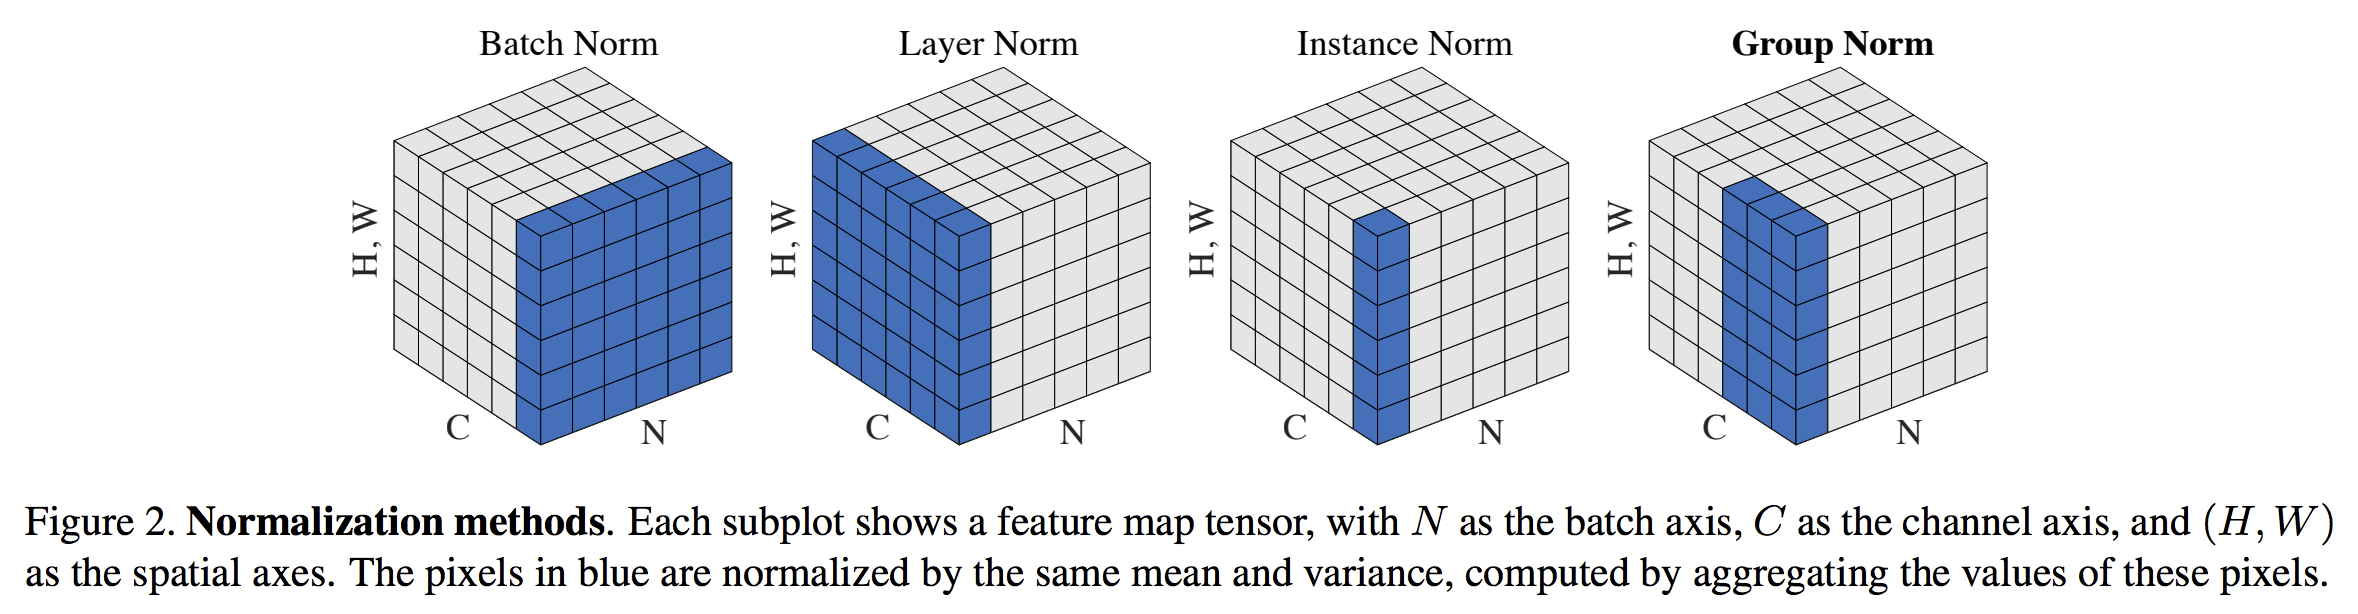


또다시 10단어의 Embedding된 문장을 예로,
- `[10, 512]`에서 **512차원 Feature를 정규화하여 분포를 일정하게 맞춰주는 것**이죠. 
- : 10개의 단어 -> 10개의 feature vector ~ 512개의 feature를 가짐
- 각 feature(단어)에 대해 따로 계산(정규화) -> 각 feature에 대해 독립적. 
- hidden



### (2) Residual Connection : $ y = f(x) + x $
- layer를 거쳐 나온 값 $f(x)$에 layer를 거치지 않은 residual $x$를 더해줌
    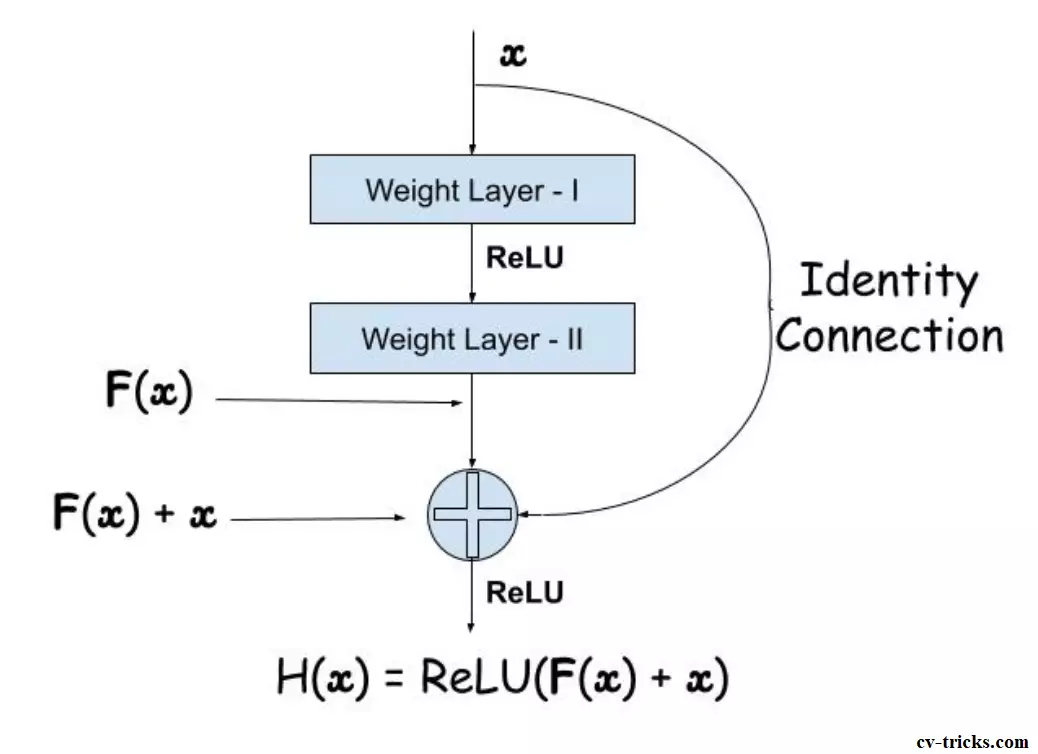

### (3) Learning Rate Schedular : 
- 참고 : https://wikidocs.net/157282
- `Learning rate schedule` : 학습이 진행됨에 따라 epoch 또는 iteration 간에 학습률을 조정하는 사전 정의된 프레임워크

"Attention all you need"에서 사용된 optimizer : `Adam`
- 이 Adam에 적용될 learning rate에 수식(schedular)을 적용
    >- $lrate = d_{model}^{-0.5}\cdot min(step\_num^{-0.5},\;step\_num\cdot warmup\_steps^{-1.5})$
    >- $d_{model} = 512$ : feature 차원수(단어 embedding vector의 차원(원소)수)
    >- $warmup\_steps = 4000$  : learning rate 변화를 결정하는 값(hyper-parameter)
    >- $min(a, b)$ : a, b 중 작은값

위 수식을 따르게 되면 $warmup\_steps$까지는 $lrate$가 선형적으로 증가 하고, 이후에는 $step\_num$에 비례해 점차 감소하는 모양새를 보이게 됩니다.

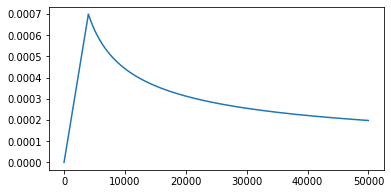

In [43]:
# 수식이 적용된 epoch에 따른 lrate 변화 시각화 

import matplotlib.pyplot as plt
import numpy as np

d_model = 512
warmup_steps = 4000

lrates = []
for step_num in range(1, 50000):
    lrate = (np.power(d_model, -0.5)) * np.min([np.power(step_num, -0.5), 
                                                step_num * np.power(warmup_steps, -1.5)])
    lrates.append(lrate)

plt.figure(figsize=(6, 3))
plt.plot(lrates)
plt.show()


이와 같은 Learning Rate를 사용하면 
- **초반 학습**이 잘 되지 않은 상태에서의 학습 효율이 늘어나고, 
- 어느 정도 학습이 된 후반에는 디테일한 튜닝을 통해 `Global Minimum`을 찾아가는 효과가 나게 됩니다. 
- 학습의 **초반**과 **후반**은 `warmup_steps` 값에 따라 결정되고요. 직관적으로도 멋진 개념입니다!

- `warmup_steps` : learning rate에 변화를 주는 부분

### (4) Weight Sharing

- `weight sharing` : 하나의 weight를 두 개 이상의 layer가 동시에 사용. 

Attention is all you need에서는 
- decoder의 embedding layer(`target embedding`)와 ouput linear layer의 weight를 공유
- 추가로 input embedding layer(`source embedding`)도 같이 공유했는데 
    - 이는 소스와 타겟의 두 언어가 유사할 경우에 선택적으로 사용

또한,<br>
출력층 Linear 레이어와<br>
Embedding 레이어의 <u>**Feature 분포가 다르므로**</u> <br>

Embedding 된 값에 $d_{model}$의 제곱근 값을 곱해 normalization.<br>
> $output\; embeddings \in \mathbb{R}^{vocab\_size\;\times\; d_{model}^*} $

이는 분포를 맞춰줌과 동시에 Positional Encoding이 Embedding 값에 큰 영향을 미치는 것을 방지해 줍니다.


>- Weight Sharing 장점 :<br><br>
    - 튜닝해야 할 <u>**파라미터 수가 감소**</u>하기 때문에 학습에 더 유리
    - 자체적으로 Regularization 되는 효과 : <u>**유연성이 제한되어 과적합을 피하기 용이**</u>

## 13-8. 트랜스포머, 그 후엔

### GPT, BERT
[BERT와 GPT](https://ratsgo.github.io/nlpbook/docs/language_model/bert_gpt/#gpt)

- GPT, BERT : transformer architecture를 기본 뼈대로 하는 모델

- `GPT(Generative Pre-trained Transformer)` : 언어모델(Language Model)
    - 이전 단어들이 주어졌을 때 다음 단어가 무엇인지 맞추는 과정에서 프리트레인(pretrain)합니다. 
    - 문장 <u>시작부터 순차적으로 계산</u>한다는 점에서 `일방향(unidirectional)`입니다.
    - 단방향 Attention을 사용


- `BERT(Bidirectional Encoder Representations from Transformers)` : 마스크 언어모델(Masked Language Model)
    - 문장 중간에 빈칸을 만들고 해당 빈칸에 어떤 단어가 적절할지 맞추는 과정에서 pretrain합니다. 
    - 빈칸 앞뒤 문맥을 모두 살필 수 있다는 점에서 `양방향(bidirectional)` 성격을 가집니다.
    - 양방향 Attetion을 사용


> 이 때문에 
>
>- **GPT는 문장 생성**에, 
>- **BERT는 문장의 <u>의미</u>를 추출**하는 데 강점을 지닌 것으로 알려져 있습니다. <br>
>
>한편 
>
>- BERT는 트랜스포머에서 인코더(encoder), 
>- GPT는 트랜스포머에서 디코더(decoder)만 취해 사용
>
>한다는 점 역시 다른 점입니다.





- `Transformer-XL`: 문단의 문맥을 파악하는 수준까지의 보다 긴 입력 길이를 처리할 수 있도록, 기존의 트랜스포머에 Recurrence라는 개념을 추가<br>
[Transformer-XL 자료 정리 및 설명요약](https://comeng.tistory.com/entry/Transformer-XL-%EC%9E%90%EB%A3%8C%EC%A0%95%EB%A6%AC-%EB%B0%8F-%EC%84%A4%EB%AA%85%EC%9A%94%EC%95%BD)


- `Reformer`: 트랜스포머를 연산량 측면에서 혁신적으로 개선한 모델<br>
[Reformer:효율적인 트랜스포머](https://brunch.co.kr/@synabreu/31)


- Multi-Head Attention에서 모든 Head가 과연 필요한가?<br>
[월간 자연어 처리 - MHA](https://www.facebook.com/permalink.php?story_fbid=156092245822648&id=111809756917564)<br>
[(논문리뷰) Are Sixteen Heads Really Better than One?](https://littlefoxdiary.tistory.com/m/66?category=847374)


이 외에도 XLNet, ELECTRA, RoBERTa, GPT-3... 

## 13-9. 마무리하며

### Keyword

1. attention 역사
2. Transformer (Attention all you need) 
    1. Positional Encoding
        1. sinusoid encoding
        2. positional embedding
    2. Multi-Head Attention
        1. scaled dot-product attention
        2. 인과 관계 마스킹(Causality Masking)
        3. multi-head attention
    3. Position-wise Feed-Forward Networks
    4. Additional Techniques: Add & Norm
        1. Layer Normalization
        2. Residual Connection
        3. Learning Rate Schedular
        4. Weight Shareing
3. Transformer 이후
    1. GPT, BERT
    2. Transformer-XL
    3. Reformer